In [22]:
import pbjam as pb
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.1]
teff = [4750, 100]

In [4]:
lc = lk.search_lightcurvefile(kic, quarter=5).download().PDCSAP_FLUX

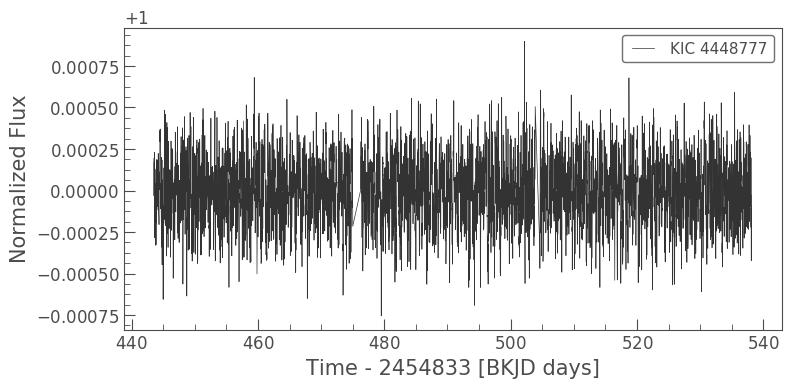

In [6]:
lc = lc.remove_nans().normalize().flatten().remove_outliers()
lc.plot()

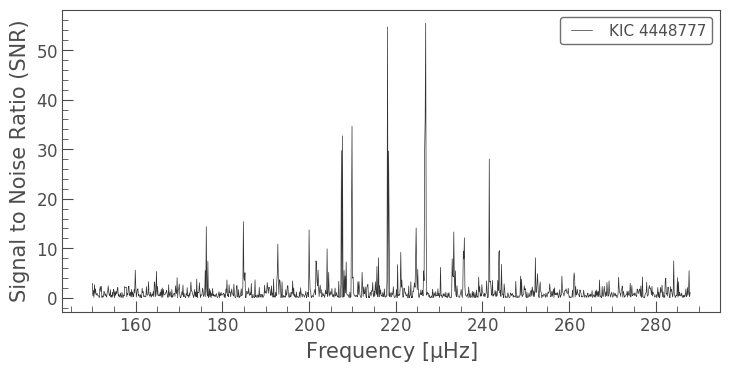

In [11]:
p = lc.to_periodogram(freq_unit=u.microHertz, max_frequency=288, min_frequency=150).flatten()
p.plot()

In [16]:
ge_vrard = pb.epsilon()
ep_vrard = ge_vrard(dnu, numax, teff)
print(f'Epsilon from Vrard : {ep_vrard}')

Epsilon from Vrard : [1.3781589243447712, 0.1]


In [17]:
ge_kde = pb.epsilon(method='kde')
ep_kde = ge_kde(dnu, numax, teff)
print(f'Epsilon from kde : {ep_kde}')

Epsilon from kde : [1.3313399930358913, 0.09926915266556241]


In [27]:
n = np.arange(8,16)
f_vrard = (n + ep_vrard[0]) * dnu[0]
f_kde = (n + ep_kde[0]) * dnu[0]

(0, <Quantity 58.17908634>)

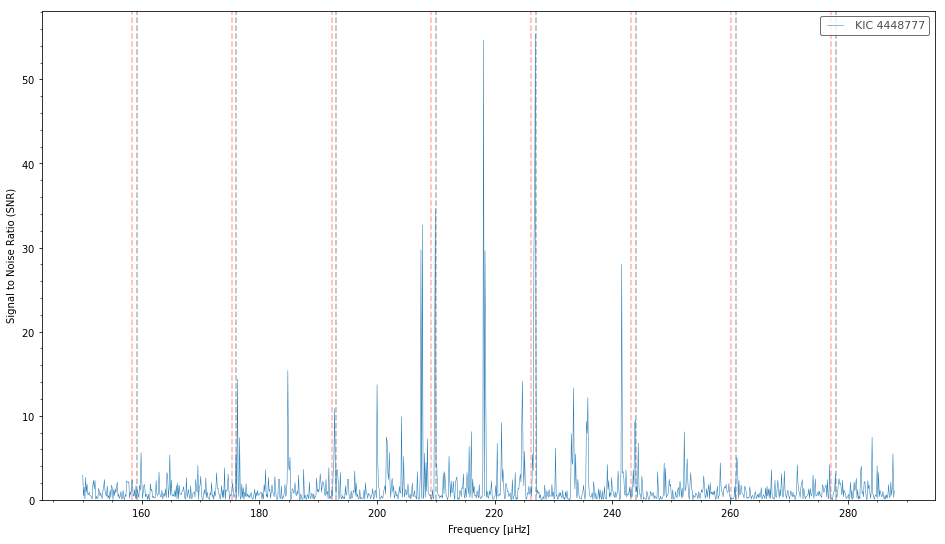

In [33]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
for i in range(len(n)):
    ax.axvline(f_vrard[i], c='k', linestyle='--', zorder=0, alpha=0.3)
    ax.axvline(f_kde[i], c='r', linestyle='--', zorder=0, alpha=0.3)
ax.set_ylim([0, p.power.max()*1.05])

In [35]:
x0 = [numax[0], dnu[0], 0.1, ep_kde[0], 0.03, 30, numax[0]*0.2, -1.0, 2.6]
asy = pb.mcmc(p.frequency.value, p.power.value, x0)
samples = asy(x0)

Burmingham
Sampling


In [37]:
print(np.mean(samples, axis=0))
print(np.std(samples, axis=0))

[ 2.19559617e+02  1.69711688e+01  1.31262556e-01  1.36374712e+00
  8.31500397e-03  2.61385494e+01  4.28096053e+01 -7.85873020e-01
  2.90003088e+00]
[7.64676227e+00 5.70796022e-02 6.69948087e-03 4.40639648e-02
 1.18117822e-02 6.37071832e+00 2.19065184e+00 9.17122620e-02
 5.44942102e-01]


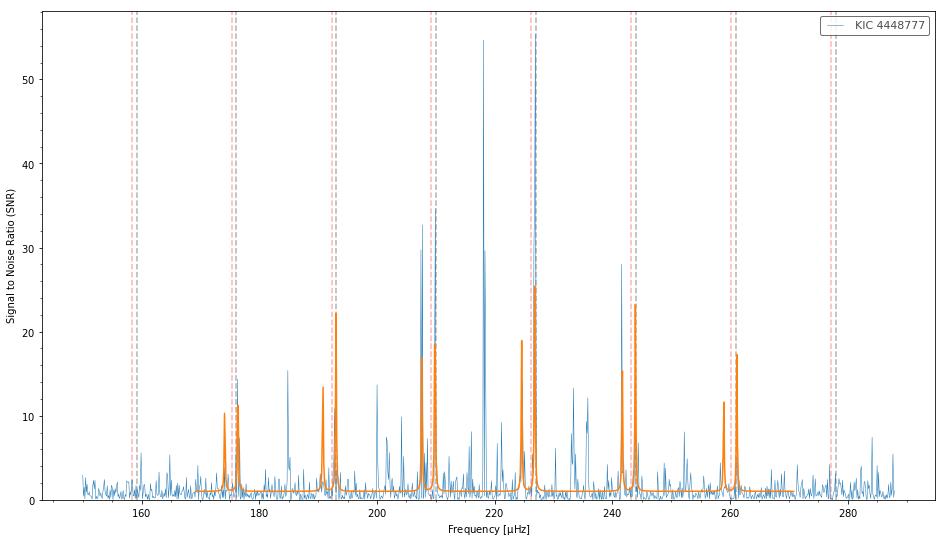

In [43]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
for i in range(len(n)):
    ax.axvline(f_vrard[i], c='k', linestyle='--', zorder=0, alpha=0.3)
    ax.axvline(f_kde[i], c='r', linestyle='--', zorder=0, alpha=0.3)
ax.set_ylim([0, p.power.max()*1.05])
model = asy.model(np.mean(samples, axis=0)[:-1])
ax.plot(asy.f[asy.sel], model)

In [44]:
# TODO Add in code to peak bag all of the modes somehow!